# Plotting Lab

In the `datasets/` folder in this notebook you will find the `salary` dataset.

- `salary.csv` -- a dataset comparing salary data across gender and tenure lines for academics 

Your task is to use Matplotlib and Seaborn to create high-quality plots for this dataset. 

**Your deliverable for this lab is to push a completed version to your Github Enterprise account by Sunday. This is a required homework assignment.**

Part of effective data science work is to be able to take new datasets and investigate them for interesting correlations or relationships that might be the basis of future research or investigation. Take this lab as an opportunity to practice those skills as well and how plotting can help you in that goal!

##### Useful Workflow Tips

1. Open the data and do a quick EDA:
  - How many rows and columns?
  - Is there missing data?
  - What do each of the columns mean?
    - Sometimes it may not be clear at first glance so double check
    - **Googling for some insight into that domain (such as salary information for the academic world) is not just highly encouraged, but may be 100% required in some cases**
  - At first glance, are there columns that you think might have an interesting relationship?
2. Begin plotting:
  - Use something like seaborn's pairplot to visualize overall relationships
  - Start digging into bivariate (involving or depending on two variables) relationships
  - If a variable of interest is encoded as a string, perform a Pandas method to convert it into numeric values, if possible.
3. Refine plots:
  - Try different plotting types / plotting options to create accurate, interesting, and engaging plots
  - Remember to include titles, axes labels, etc.
  - **Does your plot have a story? What should a reader take away from your plots?**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Salary

In [4]:
salary = pd.read_csv('salary.csv')
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


- `sx` -> sex (gender)
- `rk` -> rank (full, associate, assistant)
- `yr` -> years of service or years in field
- `dg` -> last degree earned
- `yd` -> years since degree
- `sl` -> salary

`1. How many rows and columns?`

In [5]:
salary.shape

(57, 6)

In [6]:
salary.isnull().sum()

sx    0
rk    0
yr    0
dg    0
yd    0
sl    0
dtype: int64

`2. Check for missing values. Address if needed.`

In [8]:
salary.isnull().sum()

sx    0
rk    0
yr    0
dg    0
yd    0
sl    0
dtype: int64

`3. Review datatypes for each column in your dataframe. Per the instructions above, convert any as needed.`

In [9]:
salary.dtypes

sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object

In [10]:
salary.dtypes?

In [11]:
salary["sl"]= salary["sl"].astype(float)

In [12]:
salary.dtypes

sx     object
rk     object
yr      int64
dg     object
yd      int64
sl    float64
dtype: object

In [13]:
sex = pd.get_dummies(salary['sx'])
salary = pd.concat([salary, sex], axis =1)
#salary = salary.rename(columns={'F':'sx_female','M':'sx_male'})
salary.head()

,sx,rk,yr,dg,yd,sl,female,male
0,male,full,25,doctorate,35,36350.0,0,1
1,male,full,13,doctorate,22,35350.0,0,1
2,male,full,10,doctorate,23,28200.0,0,1
3,female,full,7,doctorate,27,26775.0,1,0
4,male,full,19,masters,30,33696.0,0,1


In [14]:
Rank = pd.get_dummies(salary['rk'])
salary = pd.concat([salary, Rank], axis =1)
salary.head()

,sx,rk,yr,dg,yd,sl,female,male,assistant,associate,full
0,male,full,25,doctorate,35,36350.0,0,1,0,0,1
1,male,full,13,doctorate,22,35350.0,0,1,0,0,1
2,male,full,10,doctorate,23,28200.0,0,1,0,0,1
3,female,full,7,doctorate,27,26775.0,1,0,0,0,1
4,male,full,19,masters,30,33696.0,0,1,0,0,1


In [15]:
salary.columns

Index(['sx', 'rk', 'yr', 'dg', 'yd', 'sl', 'female', 'male', 'assistant',
       'associate', 'full'],
      dtype='object')

`4. Visualize the distributions of the series or columns in your dataframe.`
- `What type or types of plots are most appropriate here?`
- `What variables are categorical (labels)?`
- `Which are continuous?`
- `Are any ordinal?`

#### - 4a.Histogram and Density are the most appropriate 

#### - 4b.The categorical variable is Sex 

#### - 4c. The continous variables are Salary , Years Since Degree and Years of Service 

#### - 4d. The ordinal variables are Degree and Rank


`4a.`

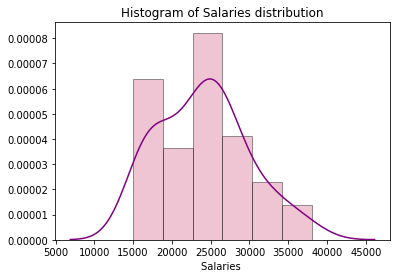

In [16]:

sns.distplot(salary['sl'], color = 'purple' , hist_kws={'edgecolor':'black', "color":'palevioletred' });
plt.title('Histogram of Salaries distribution');
plt.xlabel('Salaries ');


`4b.`

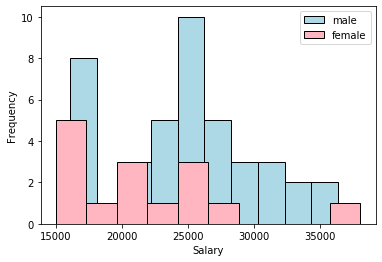

In [17]:
plt.hist(list(salary[salary['male']==1]['sl']), 
            ec = 'black', color='lightblue', label='male')
plt.hist(list(salary[salary['female']==1]['sl']), 
            ec = 'black' ,color="lightpink", label='female')
plt.legend()
plt.ylabel('Frequency'), plt.xlabel('Salary');

`4c.`

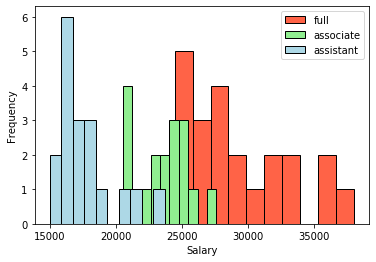

In [18]:


plt.hist(list(salary[salary['full']==1]['sl']), 
            ec = 'black', color='tomato', label='full')
plt.hist(list(salary[salary['associate']==1]['sl']), 
            ec = 'black' ,color="lightgreen", label='associate')
plt.hist(list(salary[salary['assistant']==1]['sl']), 
            ec = 'black' ,color="lightblue", label='assistant')
plt.legend()
plt.ylabel('Frequency'), plt.xlabel('Salary');

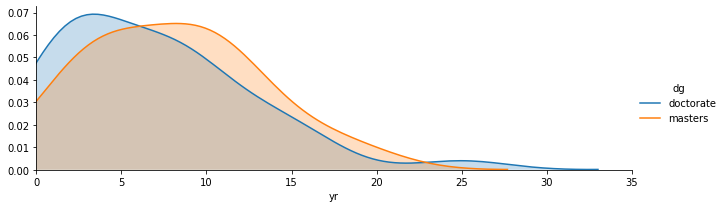

In [19]:

age_class = sns.FacetGrid(salary, hue='dg', aspect=3, legend_out=True );
age_class.map(sns.kdeplot, "yr", shade=True  ).add_legend();
age_class.set(xlim=(0, 35));

`4d. BONUS: Include the skew of each continuous variable distribution in the title of the plot.`

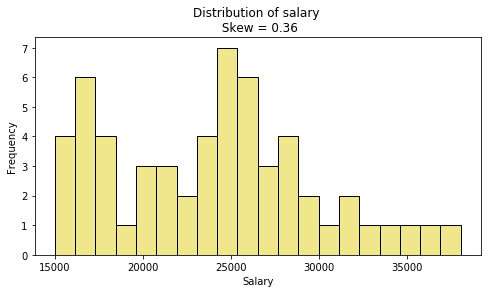

In [20]:
salary['sl'].hist(grid=False,  color='khaki', edgecolor='#000000', bins=20, figsize=(8,4))
plt.title('Distribution of salary \n Skew = ' + str(salary['sl'].skew())[:4],  color='black')
plt.ylabel('Frequency'), plt.xlabel('Salary');

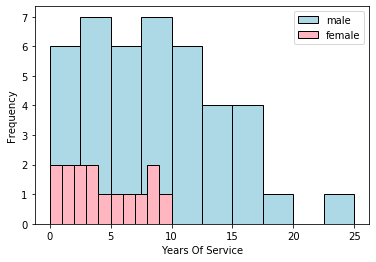

In [21]:
plt.hist(list(salary[salary['male']==1]['yr']), 
            ec = 'black', color='lightblue', label='male')
plt.hist(list(salary[salary['female']==1]['yr']), 
            ec = 'black' ,color="lightpink", label='female')
plt.legend()
plt.ylabel('Frequency'), plt.xlabel('Years Of Service');

`5. Visualize the relationships between series or columns in your dataframe.`
- `What type or types of plots are most appropriate here?`

## The most appropriate plots are barchart, boxplot and scatter plot

`5a.`

C:\Users\aSusTouch\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\aSusTouch\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


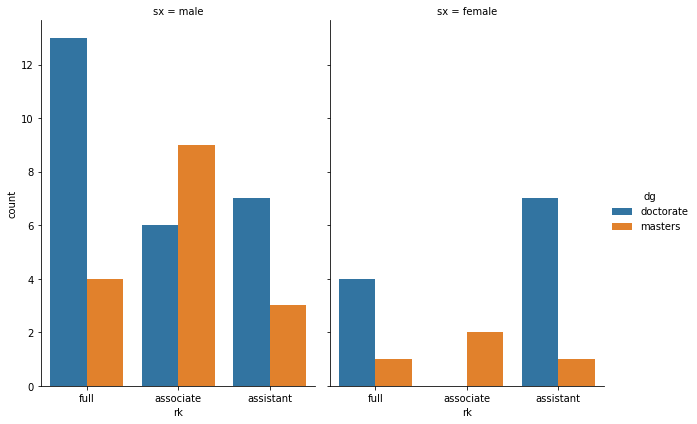

In [22]:
sns.factorplot(x="rk", hue="dg", col="sx", data=salary, kind="count",size=6, aspect=.7 );
plt.savefig('salaryBarchart.png');


`5b.`

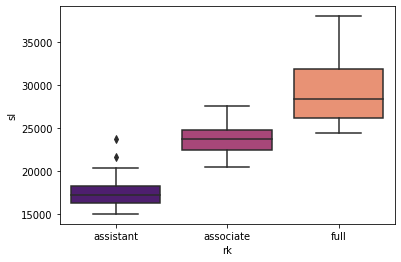

In [23]:
plotbox1 = salary.groupby(['rk'])['sl'].median().sort_values() 
sns.boxplot(x=salary['rk'], y=salary['sl'], order=list(plotbox1.index) , palette='magma'  );

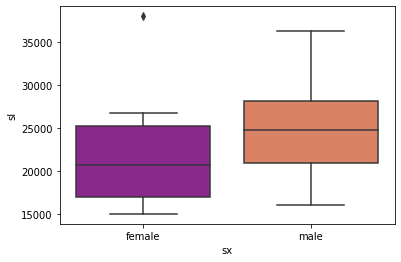

In [24]:
plotbox1 = salary.groupby(['sx'])['sl'].median().sort_values() 
sns.boxplot(x=salary['sx'], y=salary['sl'], order=list(plotbox1.index) , palette='plasma'  );

`5c.`

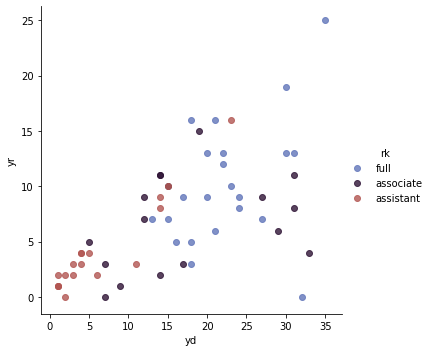

In [25]:
sns.lmplot(x='yd', y='yr', hue='rk', data=salary , fit_reg=False , palette='twilight' );

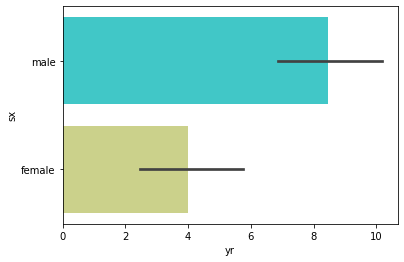

In [26]:
sns.barplot(x='yr', y='sx', data=salary, 
            palette='rainbow');

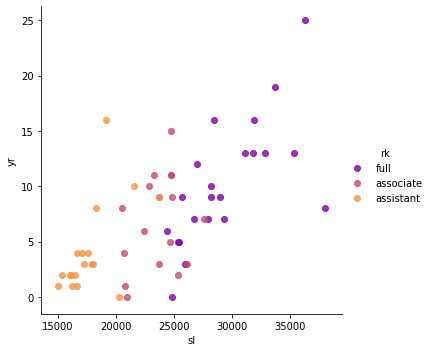

`5d. Save at least one plot as a png file.`

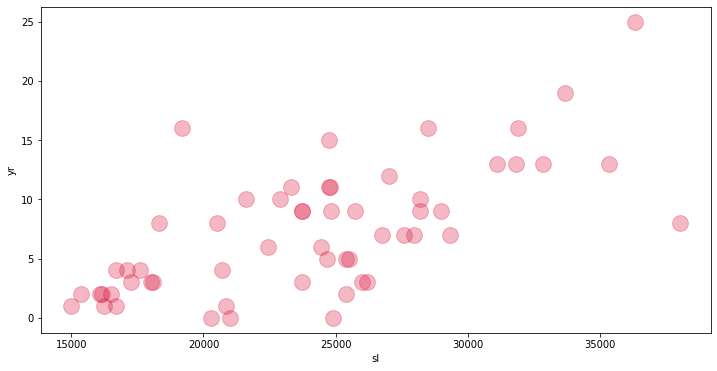

In [31]:
salary.plot.scatter(x='sl', y='yr', color="crimson" , figsize=(12,6) , alpha=0.3, s=250);
plt.savefig('salary.png');

 `6. Check for correlation between variables in your dataframe.`
- `Explain in a comment or in markdown form which variables have strong correlation and which have weak correlation`
- `Why might this matter?`

In [1]:
salary_correlations = salary.corr();
sns.heatmap(salary_correlations);

NameError: name 'salary' is not defined

#### High correlation : 1- salary with full , years of service and years since degree   2- years of service with years since degree
                      
#### Weak correlation : 1- salary with assistant  2- assistant with years of service

#### If two variables have a correlation value of 1, this means that they have perfect positive correlation.
#### Perfect negative correlation has a value of -1, and it would mean that the variables move in opposite directions.

### correlation Importance  

#### Once correlation is known it can be used to make predictions.  When we know a score on one measure we can make a more accurate prediction of another measure that is highly related to it.  The stronger the relationship between variables the more accurate the prediction.


`7. Now visualize that correlation output:`

In [ ]:
salary.corr().style.set_caption('Correlation Matrix for salary').background_gradient(cmap=sns.light_palette("pink", as_cmap=True))

`8. Write up a paragraph or two to explain the plot choices you made earlier in the notebook.`
- `Additionally, explain what you've learned about this dataset comparing salary data across gender and tenure lines for academics.`
- `Remember the line from the instructions: "Does your plot have a story? What should a reader take away from your plots?"`

### I chose histogram and density plot to explain the distribution between columns and to explain the relationships I used barchart, boxplot and scatter plot. Also to show the correlation between variables I used heatmap. 

Based on the visualization above, it's clear that people whose ranked full are mostly holding doctorate and also they have the highest salaries, years of services and years since degree. Most of the people whose ranked full are males, whereas only 4 females ranked full and holding a doctorate.

Moreover, 6 males and females are holding doctorate but they are ranked as an assistant!

#### Salary range:
    Full (25000 - 37000)
    Associate (21000 - 27000)
    Assistant (15000 - 20000)

#### Outliers:
    Two assistants are getting paid more than 21000.
    One female who’s ranked full and holding a doctorate is getting paid more than 38000.


